# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

* 가설1 : 휴대폰 가격에 따라 이탈여부에 유의미한 차이가 있을 것이다

* 가설2 : 만족도 설문 결과가 나쁠수록 이탈율이 높을 것이다

* 가설3 : 월 초과사용 시간이 평균 통화시간보다 높으면 이탈율이 높을 것이다

* 가설4 : 연 수입액이 높을수록 이탈율이 낮아질 것이다.(대학 졸업여부에 따라 두 그룹으로 분리)

* 가설5 : 변경 계획 설문에서 바꾸겠다는 의사를 표현한 사람의 이탈율이 높을 것이다

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

In [16]:
target = 'CHURN'

### 1) INCOME

In [18]:
Income = 'INCOME'

In [4]:
mobile['INCOME'].head()

0     47711
1     74132
2    150419
3    159567
4     23392
Name: INCOME, dtype: int64

① 변수의 비즈니스 의미

고객의 수입 별 이탈여부

② 숫자, 범주?

숫자

③ NaN 존재 유무

In [11]:
mobile['INCOME'].isnull().sum()

0

④ 기초통계량(수치화)

In [12]:
mobile['INCOME'].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

⑤ 분포 확인(시각화)

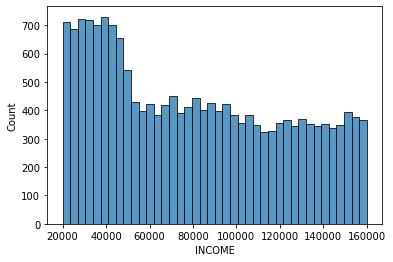

In [13]:
sns.histplot(data = mobile, x = 'INCOME', bins = 40)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

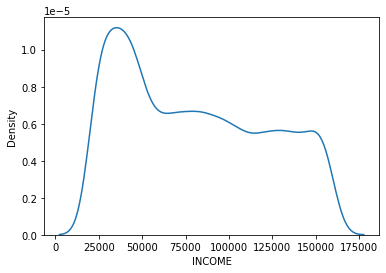

In [175]:
sns.kdeplot(data = mobile, x = 'INCOME')
plt.show

* 수치화 통계

In [44]:
modelIC = sm.Logit(mobile[target],mobile[Income])
modelICf = modelIC.fit()
print(modelICf.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 이거 상관관계가 없는 것 아닌가?

* 돈이 많은 사람들은 이탈을 많이 한다?

⑦ 추가 분석해 볼 사항이 있나요?

* 교육 수준별, 연 수입 별 이탈여부

### 2) Phone Price

In [24]:
PhonePrice = 'HANDSET_PRICE'

① 변수의 비즈니스 의미

* 휴대폰 가격에 따른 이탈 여부

② 숫자, 범주?

숫자(단, 특정 값에 따라 분류해서 범주화 가능)

③ NaN 존재 유무

In [25]:
mobile[PhonePrice].isnull().sum()

0

④ 기초통계량(수치화)

In [26]:
mobile[PhonePrice].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

⑤ 분포 확인(시각화)

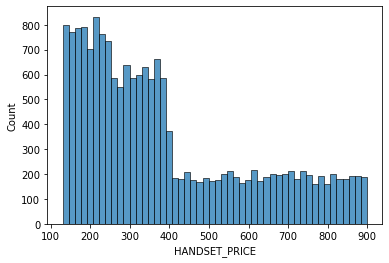

In [27]:
sns.histplot(data = mobile, x = PhonePrice, bins = 50)
plt.show()

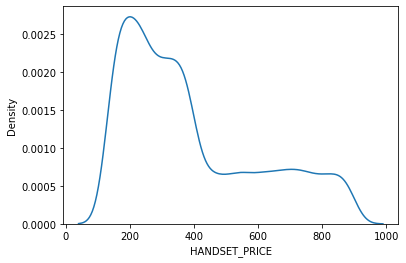

In [168]:
sns.kdeplot(data = mobile, x = PhonePrice)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 고가의 휴대폰을 쓰는 사람들이 쉽게 이탈하지 않게 할 수 있는 조치가 필요하다.

### ⑦ 추가 분석해 볼 사항 

휴대폰 가격에 따른 이탈여부

### 3) 만족도 설문 결과

In [45]:
Satisfaction = 'REPORTED_SATISFACTION'

① 변수의 비즈니스 의미

* 만족도 설문 결과 별 이탈여부 차이

② 숫자, 범주?

범주

③ NaN 존재 유무

In [46]:
mobile[Satisfaction].isnull().sum()

38

* 3 - 1 : 결측치 제거

In [112]:
mobile2 = mobile.copy()
mobile2.dropna( axis = 0, inplace = True)
mobile2[Satisfaction].isnull().sum()

0

④ 기초통계량(수치화)

In [113]:
mobile2.describe()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,CHURN
count,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000,17746.000000
mean,0.502930,80315.387862,86.037755,23.993745,492989.524625,390.098783,5.991773,0.493125
std,0.500006,41723.305095,85.958453,26.866310,252133.234102,214.146350,4.400715,0.499967
min,0.000000,20007.000000,0.000000,0.000000,150015.000000,130.000000,1.000000,0.000000
25%,0.000000,42082.750000,0.000000,0.000000,263960.250000,219.000000,2.000000,0.000000
50%,1.000000,75510.500000,59.000000,14.000000,452259.500000,326.000000,5.000000,0.000000
75%,1.000000,116136.500000,179.000000,42.000000,701443.250000,536.000000,10.000000,1.000000
max,1.000000,159983.000000,335.000000,89.000000,999970.000000,899.000000,15.000000,1.000000


⑤ 분포 확인(시각화)

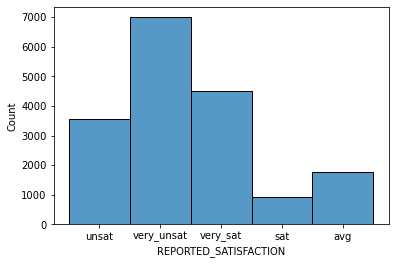

In [117]:
sns.histplot(data = mobile2, x = Satisfaction, bins = 5)
plt.show()

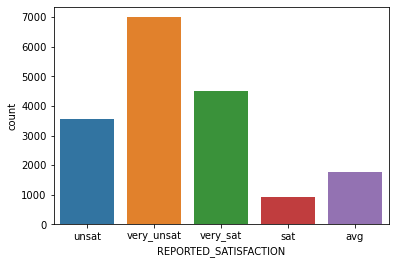

In [124]:
sns.countplot(data = mobile2, x = Satisfaction)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전반적인 서비스 만족도를 올려야겠다.

⑦ 추가 분석해 볼 사항이 있나요?

* 서비스 만족도 별 이탈율

### 4) 월 초과 사용 시간, 평균 통화 시간

In [52]:
Overuse = 'OVERAGE' #음수 값 주의
Avg_Duration = 'AVERAGE_CALL_DURATION'

① 변수의 비즈니스 의미

월 초과 사용시간, 평균 통화시간 별 이탈 여부 차이

② 숫자, 범주?

In [55]:
정수(둘 다)

dtype('int64')

③ NaN 존재 유무

In [56]:
mobile[Overuse].isnull().sum()

0

In [57]:
mobile[Avg_Duration].isnull().sum()

0

* 3 - 1 : Overuse에 음수 값 제거

In [78]:
mobile = mobile[(mobile[Overuse] >= 0)]

In [79]:
mobile[Overuse].describe()

count    17999.000000
mean        86.019723
std         85.963866
min          0.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

④ 기초통계량(수치화)

In [80]:
modelO = sm.Logit(mobile[target],mobile[Overuse])
model0f = modelO.fit()
print(model0f.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.529820e-97
dtype: float64


In [81]:
modelA = sm.Logit(mobile[target],mobile[Avg_Duration])
modelAf = modelA.fit()
print(modelAf.pvalues)

Optimization terminated successfully.
         Current function value: 0.693028
         Iterations 3
AVERAGE_CALL_DURATION    0.038015
dtype: float64


⑤ 분포 확인(시각화)

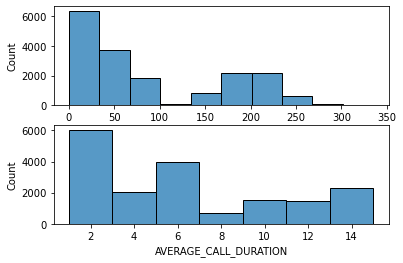

In [82]:
plt.subplot(2,1,1)
sns.histplot(data = mobile, x = Overuse, bins = 10)

plt.subplot(2,1,2)
sns.histplot(data = mobile, x = Avg_Duration, bins = 7)

plt.show()

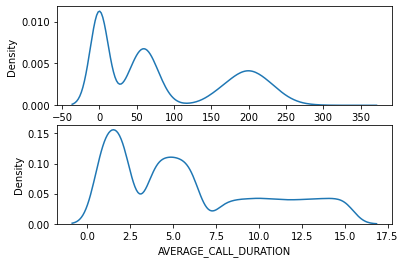

In [151]:
plt.subplot(2,1,1)
sns.kdeplot(data = mobile, x = Overuse)

plt.subplot(2,1,2)
sns.kdeplot(data = mobile, x = Avg_Duration)

plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 통화시간이 길거나 초과통화시간이 많은 고객의 비중이 적지 않다.

⑦ 추가 분석해 볼 사항 - 초과 이용시간이 0인 경우 제외

In [75]:
mobile_Real = mobile[(mobile[Overuse] > 0)]
mobile_Real[Overuse].describe()

count    11883.000000
mean       130.292771
std         73.651705
min          3.000000
25%         60.000000
50%        132.000000
75%        200.000000
max        335.000000
Name: OVERAGE, dtype: float64

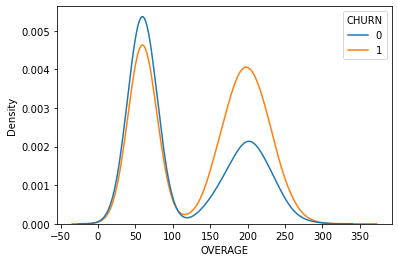

In [76]:
sns.kdeplot(data = mobile_Real, x = Overuse, hue = target)
plt.show()

In [77]:
modelOR = sm.Logit(mobile[target],mobile[Overuse])
modelORf = modelOR.fit()
print(modelORf.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.529820e-97
dtype: float64


###  결론 : 초과 사용시간이 150분 이상인 고객의 이탈율이 높다

### 5) 변경 계획 설문

In [85]:
Change_Plan = 'CONSIDERING_CHANGE_OF_PLAN'
mobile[Change_Plan].describe()

count           17999
unique              5
top       considering
freq             7140
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: object

In [87]:
mobile[Change_Plan].unique()

array(['considering', 'no', 'never_thought', 'actively_looking_into_it',
       'perhaps'], dtype=object)

① 변수의 비즈니스 의미

변경 계획 의사와 실제 변경 여부의 상관관계

② 숫자, 범주?

범주

③ NaN 존재 유무

In [88]:
mobile[Change_Plan].isnull().sum()

0

④ 기초통계량(수치화)

In [147]:
mobile[Change_Plan].describe()

count           17999
unique              5
top       considering
freq             7140
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: object

⑤ 분포 확인(시각화)

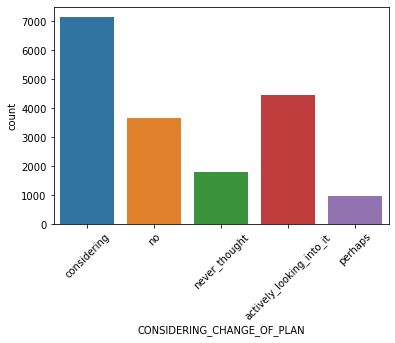

In [149]:
sns.countplot(x = Change_Plan, data = mobile)
plt.xticks(rotation = 45)
plt.show()

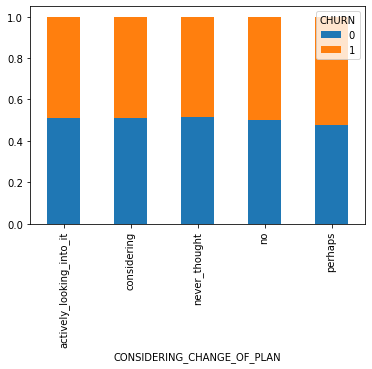

<Figure size 1080x576 with 0 Axes>

In [102]:
Ct2.plot.bar(stacked = True)
plt.figure(figsize = [15,8])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.
보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 변경 여부는 상관관계가 없다(거짓말을 할 수도 있고, 설문 전후로 의사가 바뀔 수도 있다)

⑦ 추가 분석해 볼 사항이 있나요?

-

### 6) target

In [ ]:
target = 'CHURN'

① 변수의 비즈니스 의미

이탈한 사람들의 특징, 이탈하지 않은 사람들의 특징

② 숫자, 범주?

범주

③ NaN 존재 유무

In [104]:
mobile[target].isnull().sum()

0

④ 기초통계량(수치화)

In [106]:
mobile[target].describe()

count    17999.000000
mean         0.492750
std          0.499961
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: CHURN, dtype: float64

⑤ 분포 확인(시각화)

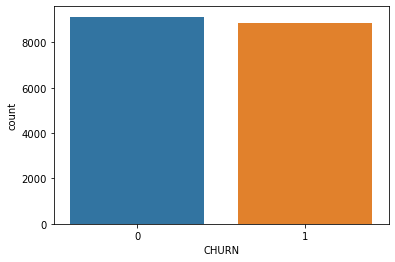

In [125]:
sns.countplot(data = mobile, x = target)
plt.show()

(<Figure size 432x288 with 3 Axes>,
 {('0',): (0.0, 0.0, 0.5047267689553787, 1.0),
  ('1',): (0.5097018933334881, 0.0, 0.49029810666651197, 1.0)})

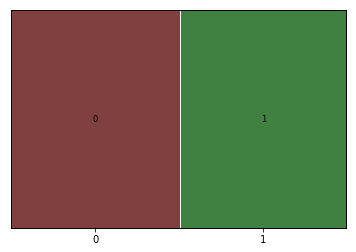

In [127]:
mosaic(mobile,[target])

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

불만족스러운데도 바꾸는 데 드는 비용과 수고 때문에 그냥 쓰는 경우가 많은 것 같다.

⑦ 추가 분석해 볼 사항이 있나요?

만족스러운데도 떠나는 사람과 불만족스러운데도 떠나지 않는 사람들의 정체

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [ ]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [137]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49274959719984446


* 설문조사 결과와 이탈율의 상관관계

#### 1) Satisfaction --> CHURN

In [141]:
Cs = pd.crosstab(mobile[target],mobile[Satisfaction])
Cs

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,952,492,1792,2334,3542
1,854,440,1798,2228,3529


① 교차표(pd.crosstab())

In [142]:
Cs2 = pd.crosstab(mobile[Satisfaction],mobile[target], normalize = 'index')
Cs2

CHURN,0,1
REPORTED_SATISFACTION,,
avg,0.527132,0.472868
sat,0.527897,0.472103
unsat,0.499164,0.500836
very_sat,0.511618,0.488382
very_unsat,0.500919,0.499081


② 시각화( Stacked Bar, Mosaic)

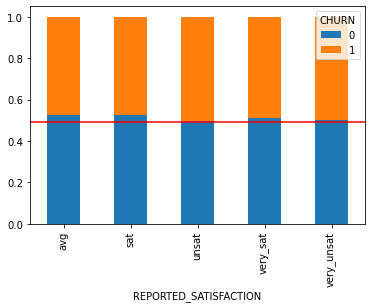

In [152]:
Cs2.plot.bar(stacked = True)
plt.axhline(total_mean, color = 'red')
plt.show()

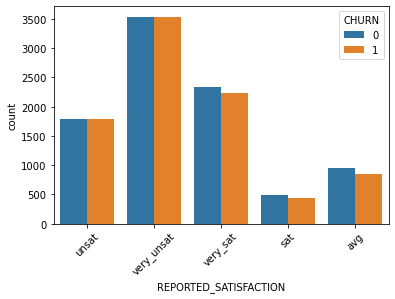

In [154]:
sns.countplot(x = Satisfaction, data = mobile, hue = target)
plt.xticks(rotation = 45)
plt.show()

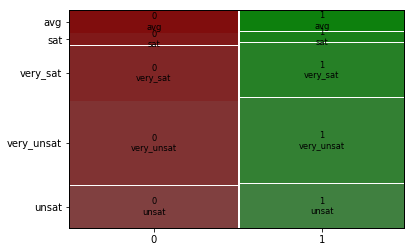

<Figure size 1440x1080 with 0 Axes>

In [153]:
mosaic(mobile,[target,Satisfaction])
plt.figure(figsize = [20,15])
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

상관관계가 거의 없는 것 같다.

③ 가설검정(카이제곱검정)

In [146]:
resultCt = spst.chi2_contingency(Cs)

print('result :',resultCt[0])
print('p-values :',resultCt[1])
print('expectancy :',resultCt[3])

result : 6.866406194530423
p-values : 0.14311872796766473
expectancy : [[ 916.22248204  472.82356216 1821.28389288 2314.40031179 3587.26975113]
 [ 889.77751796  459.17643784 1768.71610712 2247.59968821 3483.73024887]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

상관관계 없음.

#### 2) Change Plan --> CHURN

* 변경 계획 설문조사와 이탈여부의 상관관계

① 교차표(pd.crosstab())

In [158]:
CC = pd.crosstab(mobile[Change_Plan],mobile[target], normalize = 'index')
CC

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
actively_looking_into_it,0.511565,0.488435
considering,0.510784,0.489216
never_thought,0.513304,0.486696
no,0.500274,0.499726
perhaps,0.475992,0.524008


② 시각화( Stacked Bar, Mosaic)

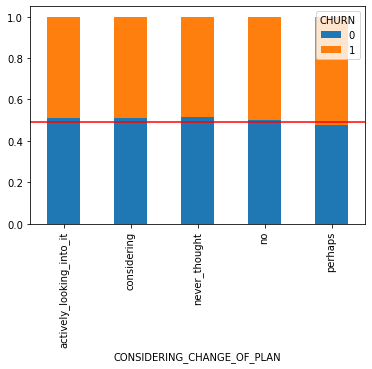

In [161]:
CC.plot.bar(stacked = True)
plt.axhline(total_mean, color = 'red')
plt.show()

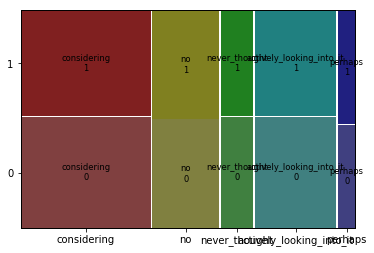

In [164]:
mosaic(mobile,[Change_Plan,target])
plt.show()

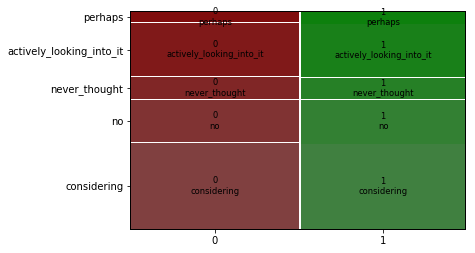

In [165]:
mosaic(mobile,[target,Change_Plan])
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

상관관계가 거의 없는 것 같은데?

③ 가설검정(카이제곱검정)

In [167]:
modelcc = spst.chi2_contingency(CC)
print('result :',modelcc[0])
print('p-values :',modelcc[1])
print('expectancy :', modelcc[3])

result : 0.0039005216046088228
p-values : 0.999998100712211
expectancy : [[0.50238388 0.49761612]
 [0.50238388 0.49761612]
 [0.50238388 0.49761612]
 [0.50238388 0.49761612]
 [0.50238388 0.49761612]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

상관관계 없음.

#### 3) College --> CHURN

In [195]:
College = 'COLLEGE'

① 교차표(pd.crosstab())

In [198]:
tableXC = pd.crosstab(mobile[College],mobile[target])
tableXC

CHURN,0,1
COLLEGE,,
0,4615,4335
1,4515,4534


In [199]:
tableXC2 = pd.crosstab(mobile[target],mobile[College], normalize = 'index')
tableXC2

COLLEGE,0,1
CHURN,,
0,0.505476,0.494524
1,0.488781,0.511219


② 시각화( Stacked Bar, Mosaic)

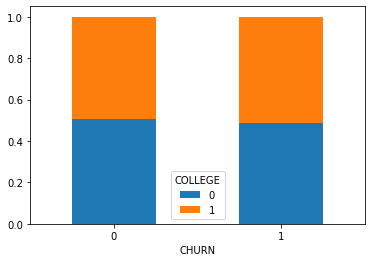

In [201]:
tableXC2.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.show()

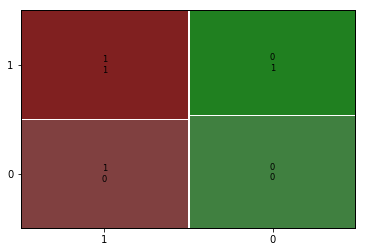

In [202]:
mosaic(mobile,[College,target])
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 상관관계가 거의 없는 것 같은데?

③ 가설검정(카이제곱검정)

In [203]:
resultXC = spst.chi2_contingency(tableXC)
resultXC

(4.949453973738073,
 0.026098910116903733,
 1,
 array([[4539.89110506, 4410.10889494],
        [4590.10889494, 4458.89110506]]))

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

상관관계가 미약하게나마 있는 것 같기도?

### 3 - 1) 추가 : 대학 졸업 여부는 정말 쓸모 없는 정보인가?

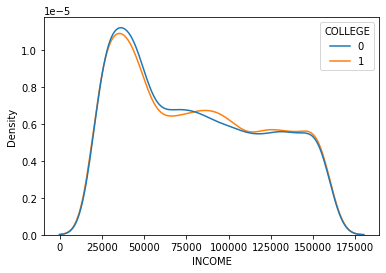

In [249]:
sns.kdeplot(data = mobile, x = Income, hue = College, common_norm = False)
plt.show()

* 그런 것 같다

### (2) 숫자형 Overuse --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Avg_Duration, Overuse --> CHURN


* 평균 이용시간, 초과 이용시간과 이탈여부의 상관관계

① 그래프 : histogram, densityplot

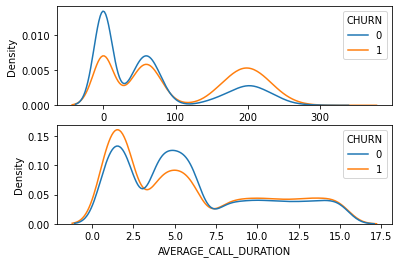

In [150]:
plt.subplot(2,1,1)
sns.kdeplot(data = mobile, x = Overuse, hue = target, common_norm = False)

plt.subplot(2,1,2)
sns.kdeplot(data = mobile, x = Avg_Duration, hue = target, common_norm = False)

plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

초과 통화시간이 200분인 고객의 이탈율이 높고, 평균 통화시간이 5분인 고객의 이탈율이 낮다.

② 수치화 : 로지스틱회귀

In [207]:
modeltO = sm.Logit(mobile[target],mobile[Overuse])
modeltOf = modeltO.fit()
print(modeltOf.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.529820e-97
dtype: float64


In [206]:
modeltA = sm.Logit(mobile[target],mobile[Avg_Duration])
modeltAf = modeltA.fit()
print(modeltAf.pvalues)

Optimization terminated successfully.
         Current function value: 0.693028
         Iterations 3
AVERAGE_CALL_DURATION    0.038015
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 초과 통화시간이 길 때 발생하는 문제점(비용 과다청구 등)을 짚어볼 필요가 있다.

추가) 초과 시간대별 이탈율

In [212]:
mobile3 = mobile.copy()
level = pd.cut(mobile3[Overuse], [0,50,100,150,200,350],labels =['Bronze','Silver','Gold','Diamond','VIP'])
level.value_counts()

Silver     4277
VIP        2914
Diamond    2788
Bronze     1576
Gold        328
Name: OVERAGE, dtype: int64

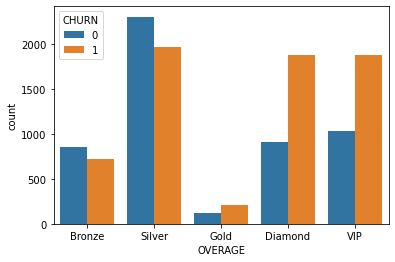

In [215]:
sns.countplot(data = mobile, x = level, hue = target)
plt.show()

#### 2) PhonePrice --> CHURN

* 휴대폰 가격와 이탈 여부의 상관관계

① 그래프 : histogram, densityplot

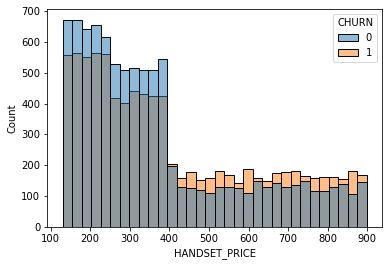

In [170]:
sns.histplot(data = mobile, x = PhonePrice, hue = target, common_norm = False)
plt.show()

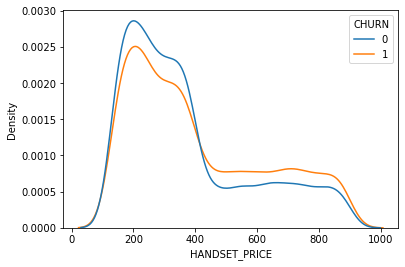

In [171]:
sns.kdeplot(data = mobile, x = PhonePrice, hue = target, common_norm = False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 400달러 전후로 묘한 상관관계가 있는데?

② 수치화 : 로지스틱회귀

In [172]:
modelIC = sm.Logit(over400[target],over400[Income])
modelICf = modelIC.fit()
print(modelICf.pvalues)

Optimization terminated successfully.
         Current function value: 0.683661
         Iterations 3
INCOME    9.046112e-27
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 상관관계가 있긴 있는데 잘 모르겠다.

#### 2 - 1) 추가 분석해 볼 사항 - 400달러 전후에 따라 이탈여부가 갈리는가?(완료)

In [35]:
over400 = mobile[(mobile[PhonePrice] >= 400)]
under400 = mobile[(mobile[PhonePrice] < 400)]

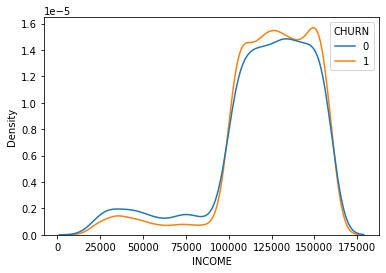

In [305]:
sns.kdeplot(data = over400, x = Income, hue = target, common_norm = False)
plt.show()

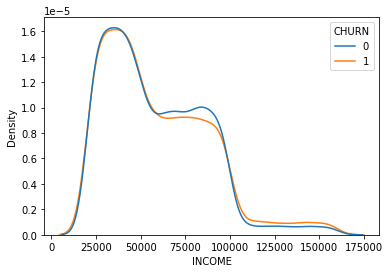

In [307]:
sns.kdeplot(data = under400, x = Income, hue = target, common_norm = False)
plt.show()

In [220]:
modelIC2 = sm.Logit(over400[target],over400[Income])
modelIC2f = modelIC.fit()
print(modelIC2f.pvalues)

Optimization terminated successfully.
         Current function value: 0.692681
         Iterations 2
INCOME    0.000042
dtype: float64


결과 : 휴대폰 값이 400달러 이하면 잔류하는 성향이 강하고, 400달러 이상이면 이탈하는 성향이 강하다.

#### 2 - 2) PhonePrice와 Income의 상관관계

* 시각화 검정

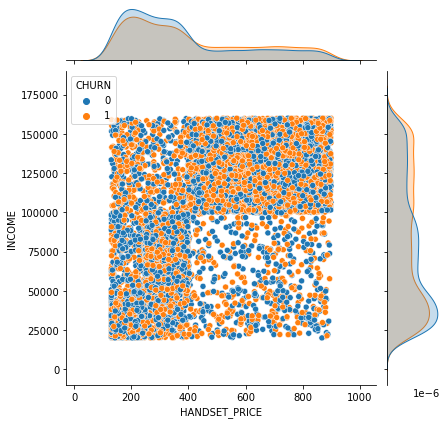

In [326]:
sns.jointplot(x = PhonePrice,y = Income, data = mobile, hue = target)
plt.show()

* 수치화 검정

In [310]:
light = mobile[(mobile[PhonePrice] < 250)]
mediate = mobile[(mobile[PhonePrice] >= 250) & (mobile[PhonePrice] < 400)]
flagship = mobile[(mobile[PhonePrice] > 400)]

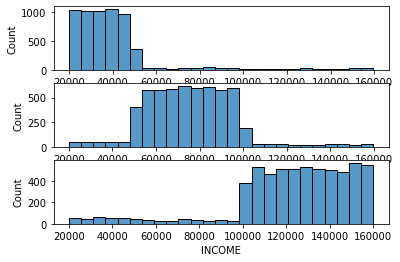

In [311]:
plt.subplot(3,1,1)
sns.histplot(data = light, x = Income, bins = 25)

plt.subplot(3,1,2)
sns.histplot(data = mediate, x = Income, bins = 25)

plt.subplot(3,1,3)
sns.histplot(data = flagship, x = Income, bins = 25)

plt.show()

In [324]:
classic = pd.cut(mobile[PhonePrice],[0,250,400,1000],labels = ['Light','Intermediate','Flagship'])
classic.head()

0           Light
1    Intermediate
2        Flagship
3        Flagship
4           Light
Name: HANDSET_PRICE, dtype: category
Categories (3, object): ['Light' < 'Intermediate' < 'Flagship']

#### 추가) 핸드폰 가격 구간 별 집값, 이탈율

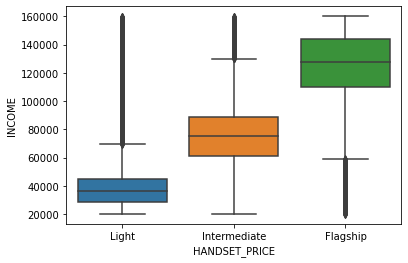

In [317]:
sns.boxplot(data = mobile, x = classic, y = Income)
plt.show()

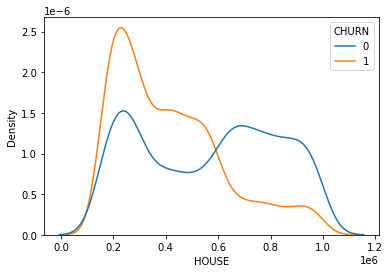

In [329]:
sns.kdeplot(data = light, x = House, hue = target, common_norm = False)
plt.show()

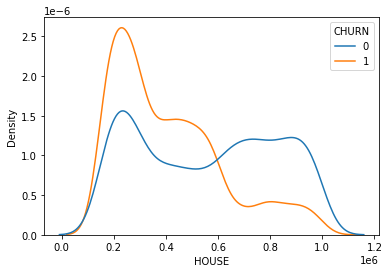

In [330]:
sns.kdeplot(data = mediate, x = House, hue = target, common_norm = False)
plt.show()

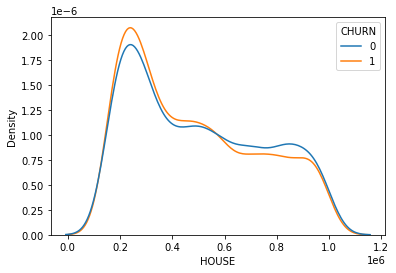

In [331]:
sns.kdeplot(data = flagship, x = House, hue = target, common_norm = False)
plt.show()

In [224]:
view = spst.pearsonr(mobile[Income],mobile[PhonePrice])
print(view)

(0.7258834503507042, 0.0)


### 결론 : 수치화 검정은 조금 애매하지만 ,시각화 검정은 확실한 구분이 있다(소득 적으면 저렴한 것, 소득 높으면 비싼 것)

#### 3) Income --> CHURN

* 연 수입과 이탈 여부의 상관관계

① 그래프 : histogram, densityplot

<function matplotlib.pyplot.show(close=None, block=None)>

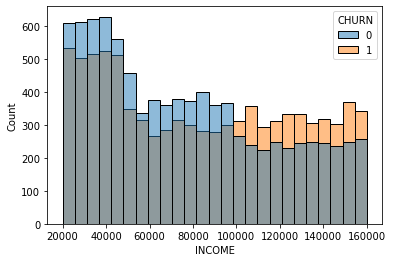

In [292]:
sns.histplot(data = mobile, x = 'INCOME', hue = target, common_norm = False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

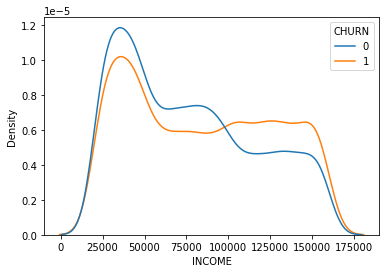

In [176]:
sns.kdeplot(data = mobile, x = 'INCOME', hue = target, common_norm = False)
plt.show

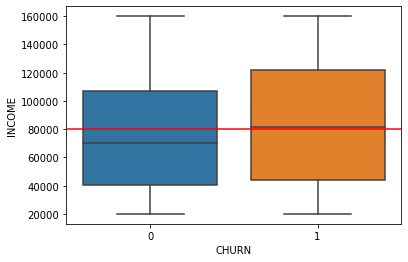

In [179]:
sns.boxplot(data = mobile, y = Income, x = target)
plt.axhline(mobile[Income].mean(), color = 'red')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

1만 달러 전후로 그래프가 교차된다

#### 3 - 1) 소득 수준 10만달러 전후로 이탈율 차이가 날까?

In [191]:
tenthousand = mobile[(mobile[Income] >= 100000)]
tenthousand.sort_values(by = 'INCOME', ascending = True, inplace = True)
tenthousand.head()

<ipython-input-191-993b8d19663f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenthousand.sort_values(by = 'INCOME', ascending = True, inplace = True)


,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
5054,0,100008,44,8,577863.0,757,6,very_sat,actively_looking_into_it,1
15726,0,100010,0,10,178219.0,455,4,very_unsat,actively_looking_into_it,0
3506,0,100037,225,12,960881.0,222,6,very_unsat,no,1
13203,1,100038,53,0,789389.0,787,10,unsat,perhaps,1
16615,0,100049,0,0,971673.0,712,15,very_unsat,actively_looking_into_it,0


In [189]:
mobile[Income].describe()

count     17999.000000
mean      80313.697928
std       41704.472210
min       20007.000000
25%       42148.000000
50%       75498.000000
75%      116082.500000
max      159983.000000
Name: INCOME, dtype: float64

In [190]:
poor = mobile[(mobile[Income] < 100000)]
poor.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
4,1,23392,0,0,216707.0,233,15,unsat,no,1
6,1,99548,235,0,238561.0,294,6,very_unsat,actively_looking_into_it,1
7,1,63338,50,57,394791.0,362,1,sat,no,0


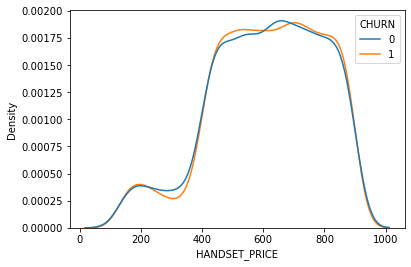

In [300]:
sns.kdeplot(data = tenthousand, x = PhonePrice, hue = target, common_norm = False)
plt.show()

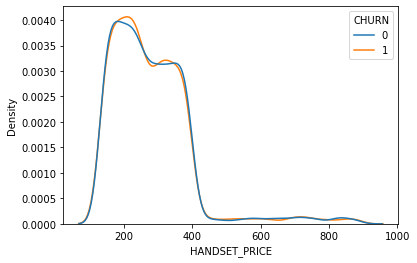

In [301]:
sns.kdeplot(data = poor, x = PhonePrice, hue = target, common_norm = False)
plt.show()

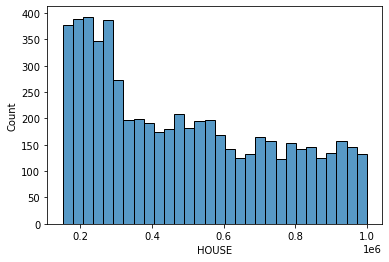

In [294]:
sns.histplot(data = tenthousand, x = House, bins = 30)
plt.show()

② 수치화 : 로지스틱회귀

In [178]:
modelIC = sm.Logit(mobile[target],mobile[Income])
modelICf = modelIC.fit()
print(modelICf.pvalues)

Optimization terminated successfully.
         Current function value: 0.692681
         Iterations 2
INCOME    0.000042
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 상관관계 있음.(강)

#### 추가) 집값과 이탈여부의 상관관계

In [250]:
House = 'HOUSE'

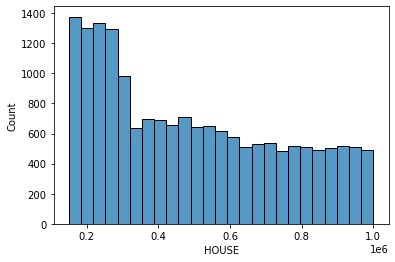

In [258]:
sns.histplot(data = mobile, x = House, bins = 25)
plt.show()

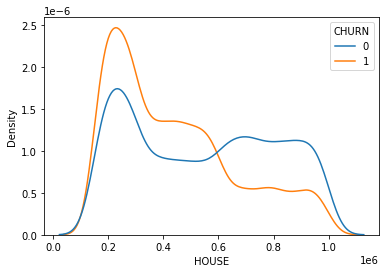

In [302]:
sns.kdeplot(data = mobile, x = House, hue = target, common_norm = False)
plt.show()

In [261]:
mobile[House].describe()

count     17784.000000
mean     492932.323830
std      252170.571191
min      150015.000000
25%      263868.750000
50%      452259.500000
75%      701457.750000
max      999970.000000
Name: HOUSE, dtype: float64

In [265]:
wealth = pd.cut(mobile[House],[0,600000,1000000],labels = ['Poor','Rich'])
wealth.value_counts()

Poor    11761
Rich     6023
Name: HOUSE, dtype: int64

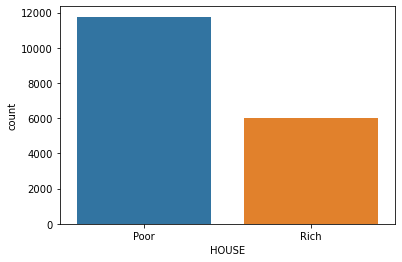

In [267]:
sns.countplot(data = mobile, x = wealth)
plt.show()

In [269]:
wtcross = pd.crosstab(mobile[target],wealth)
wtcross

HOUSE,Poor,Rich
CHURN,,
0,4905,4108
1,6856,1915


In [276]:
wtcrossp = pd.crosstab(wealth,mobile[target], normalize = 'index')
wtcrossp

CHURN,0,1
HOUSE,,
Poor,0.417056,0.582944
Rich,0.682052,0.317948


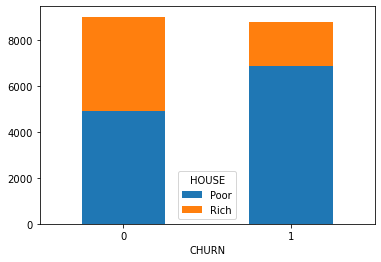

In [278]:
wtcross.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.show()

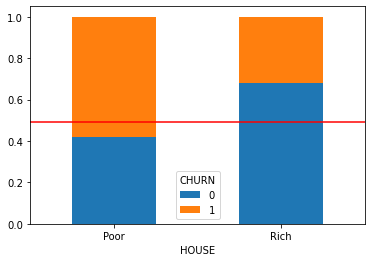

In [279]:
wtcrossp.plot.bar(stacked = True)
plt.axhline(total_mean, color = 'red')
plt.xticks(rotation = 0)
plt.show()

### 부록) 집값, 휴대폰 값, 소득의 상관관계

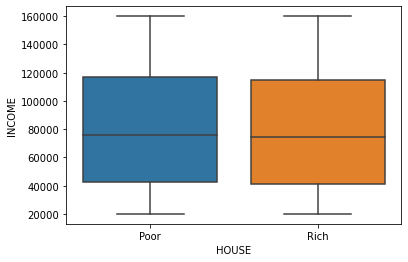

In [280]:
sns.boxplot(data = mobile, x = wealth, y = Income)
plt.show()

* 결론 : 집값이 6만 달러 미만인 사람이 이탈할 가능성이 높다.

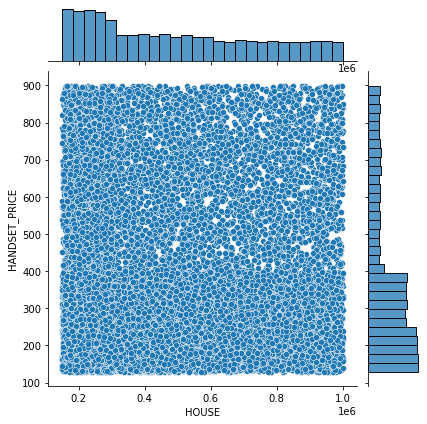

In [260]:
sns.jointplot(data = mobile, x = House, y = PhonePrice)
plt.show()

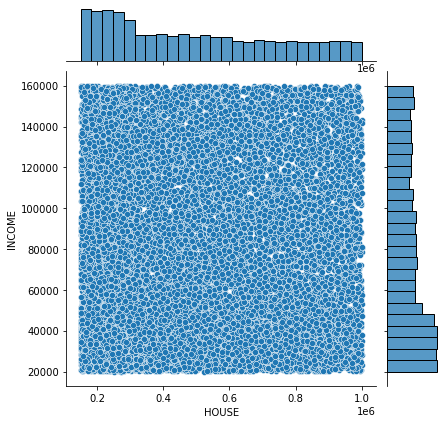

In [256]:
sns.jointplot(data = mobile, x = House, y = Income)
plt.show()

## 4.관계 정리

### 1) 강한관계의 변수

Income, Phone Price, Overuse, Avg_Duration, House

### 2) 약한관계의 변수

college, Change_Plan

### 3) 관계 없음

Satisfaction

### if 가설

경제적으로 넉넉하지 못한 사람들이 요금제를 바꾸는 데 부담스러워 하는 것은 아닐까?

초과 이용시간이 200분 이상인 사람들이 이탈하는 경우가 많은 것을 보면 많이 이용하는 고객에 대한 서비스가 문제가 있는 건 아닐까?

### 결론

* 초과 사용시간이 긴 고객들을 유치하기 위해 통화량 사용이 많을 때 유리한 요금제를 추천하거나, 초과요금 부과 체계를 개편할 필요가 있다.

* 휴대폰 비용이 400달러 이상인 고객들을 위한 프리미엄 멤버십 제도를 운영할 필요가 있다.

* 서비스가 불만족스럽다는 의견을 개선하기 위해 서비스 품질 실태를 점검할 필요가 있다.

* 서비스 품질 조사할 때 만족이라고 응답한 사람에게 쿠폰을 주는 것은 어떨까?

## 5.추가 분석